# Initial Congestion Zone Data Framing

## Notebook 1/7

## Gabriel del Valle
## 07/21/24
## NYC DATA SCIENCE ACADEMY

### For any questions about this project or to request full map videos or datasets, please feel free to reach out on Linkedin: 

   www.linkedin.com/in/gabriel-del-valle-147616152

   gabrielxdelvalle@gmail.com


## Full Project Summary:

### Three kinds of animated map (each with animated barcharts):

- Average congestion per street per datetime

- (Imputed Missing Data) Average congestion per street per datetime

- Congestion per data recording node per datetime (Congestion color coded marker on map indicating recording location)

In light of the plan for the Manhattan Congestion Relief Zone, which was originally scheduled to go into effect in June of 2024 (but was canceled on the last day by the governor of New York), this study seeks to visualize New York City traffic data into a series of animated maps with corresponding bargraphs, which illustrate congestion (a normalized measure of street mobility, congestion = current street volume / max street volume) and total volume respectively. These maps summarize the data of three months of NYC traffic volume (Octobers of 2016 - 2019) in an intuitive manner so traffic and data recording patterns are easily observed.

### Traffic routes branch analysis estimation and mapping system

In order to provide actionable insights to businesses and institutions anticipating this policy by wondering which streets should expect to see gains in mobility (and thus strategic value), I created a branch analysis method for the dataset and a means to map it. The branch analysis starts from a selected street and a selected hour. Using the average traffic volume from that street and hour, it estimates the distribution of vehicles to each next street the vehicle could take. This process can be repeated for as many branches as desired, estimating the number of vehicles from the originally selected street and hour distributed to each subsequent branch, assuming a driver will not backtrack.

### Data sources

#### Automated Traffic Counts Dataset
#### OpenNYC
#### As of 07/11/24, last updated -- 04/02/24

https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt/about_data

#### Dates Queried: 2016 to 2019
#### Note: Data collection ceased after 2019
#### Official description:

"New York City Department of Transportation (NYC DOT) uses Automated Traffic Recorders (ATR) to collect traffic sample volume counts at bridge crossings and roadways.These counts do not cover the entire year, and the number of days counted per location may vary from year to year."

#### Columns: 

- 'RequestID' : An unique ID that is generated for each counts request
- 'Boro' : Lists which of the five administrative divisions of New York City the location is within, written as a word 
- 'Yr' : year
- 'M' : month
- 'D' : day
- 'HH' : hour
- 'MM' : minute
- 'Vol' : traffic volume
- 'SegmentID' : "The ID that identifies each segment of a street in the LION street network version 14."
- 'WktGeom' : A text markup language for representing vector geometry objects on a map and spatial reference systems of spatial objects.
- 'street' : The 'On Street' where the count took place
- 'fromSt' : The 'From Street' where the count took place
- 'toSt' : The 'To Street' where the count took place
- 'Direction' : Cardinal direction of traffic flow



#### NYC Street Centerline (CSCL) -- Geojson shapefile
#### OpenNYC
#### As of 07/11/24, last updated -- 07/08/24

https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

#### Official description:


The NYC Street Centerline (CSCL) is a road-bed representation of New York City streets containing address ranges and other information such as traffic directions, road types, segment types
Previously posted versions of the data are retained to comply with Local Law 106 of 2015 and can be provided upon request made to Open Data.

#### Project relevant columns: 

- 'borocode' : A 1-digit code identifying the borough the feature is located in (Manhattan = 1)

- 'geometry' : polyline (plottable map geometry)

- 'rw_type' : Street Centerline roadway type.

- 'r_zip' : Five-digit postal zip code for the right side of the street segment, relative to the digitized direction of the segment. 

- 'l_zip' : Five-digit postal zip code for the left side of the street segment, relative to the digitized direction of the segment.

- 'st_name' : Street Name added for cartographic labeling purposes (without street suffix)

- 'st_label' : (with street suffix)


#### Unutilized columns: 


- 'l_low_hn' : Low value for the address range on the left side of the street segment, relative to the digitized direction of the segment.
- 'pre_direct' : unlisted
- 'st_width' : The width, in feet, of the paved area of the street.
- 'r_low_hn' : Low value for the address range on the right side of the street segment, relative to the digitized direction of the segment.
- 'post_type' : unlisted
- 'r_blkfc_id' : A ten-digit number identifying the block face on the right hand side of a segment. Block Face is defined as one continuous side of a physical block that is intersected on that side by two other physical through streets. Blockface IDs were established by DoITT’s consultants working on the planimetric feature classes for NYC and are not maintained by the Department of City Planning.
- 'bike_trafd' : Traffic direction for bike lanes
- 'bike_lane' : Defines which segments are part of the bicycle network as defined by the NYC Department of Transportation.
- 'frm_lvl_co' : Numeric value indicating the vertical position of the feature's "to" node relative to grade level
- 'post_modif' : unlisted
- 'pre_type' : unlisted
- 'full_stree' : unlisted
- 'l_blkfc_id' : A ten-digit number identifying the block face on the left hand side of a segment. Block Face is defined as one continuous side of a physical block that is intersected on that side by two other physical through streets. Blockface IDs were established by DoITT’s consultants working on the planimetric feature classes for NYC and are not maintained by the Department of City Planning.
- 'shape_leng' : double (undescribed)
- 'to_lvl_co' : Numeric value indicating the vertical position of the feature's "to" node relative to grade level.
- 'modified' : Date the feature was last modified
- 'status' : Refers to the construction status of a street segment: Constructed, Paper, Under Construction, Demapped, or Paper Street Coincident with Boundary.
- 'post_direc' : unlisted
- 'r_high_hn' : High value for the address range on the right side of the street segment, relative to the digitized direction of the segment.
- 'segment_ty' : unlisted
- 'snow_pri' : Department of Sanitation (DSNY) snow removal priority designation
- 'trafdir' : Traffic Direction. Code indicating the flow of traffic relative to the street segment's address range.
- 'pre_modifi'
- 'physicalid' : A unique ID assigned to intersection stretches of a street.
- 'created' : Date feature was created
- 'l_high_hn' : High value for the address range on the left side of the street segment, relative to the digitized direction of the segment. 




## In this notebook -- Data preparation plan:

## 1. Isolate both datasets to the Manhattan Congestion Relief Zone region

## 2. Clean the map

## 3. Format Centerline dataset st_name values to be consistent with Automated Traffic Count Dataset

In [395]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re

The Initial Datasets which have both been queried to be Manhattan specific.

The Automated Traffic Count Dataset was also queried for years 2016 - 2022, however it was found that data recording stopped after 2019. In the rest of the analysis only years 2016 to 2019 were used.

- Automated Traffic Count Dataset from Open NYC

https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt/data_preview

- Centerline Geojson Dataset from Open NYC

https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

In [14]:
Manhattan_traffic = pd.DataFrame(pd.read_csv('Manhattan_Automated_traffic_count.csv'))

In [6]:
centerline = gpd.read_file('Manhattan_Centerline.geojson')

In [78]:
centerline.columns

Index(['rw_type', 'l_low_hn', 'pre_direct', 'st_width', 'r_zip', 'r_low_hn',
       'bike_lane', 'post_type', 'r_blkfc_id', 'bike_trafd', 'frm_lvl_co',
       'post_modif', 'pre_type', 'full_stree', 'l_blkfc_id', 'shape_leng',
       'to_lvl_co', 'modified', 'status', 'post_direc', 'r_high_hn', 'l_zip',
       'segment_ty', 'snow_pri', 'borocode', 'trafdir', 'pre_modifi',
       'st_label', 'physicalid', 'st_name', 'created', 'l_high_hn',
       'geometry'],
      dtype='object')

In [24]:
#Filter full map of NYC to Manhattan
Manhattan_json = centerline[centerline['borocode'] == '1']

<font color='gray'>

## The task of isolating the Manhattan streets below 60th street to represent the Congestion Relief Zone can be approached in both datasets by starting with the geojson dataset, using the zipcode column. 

## Once the streets have been reduced in the geojson file, the streets of the geojson data can be mapped to confirm correct filtering. 

## Then the names from the geojson dataset can be used to filter the Manhattan_traffic dataset. (Naming formats must first be aligned.) 
    
</font>

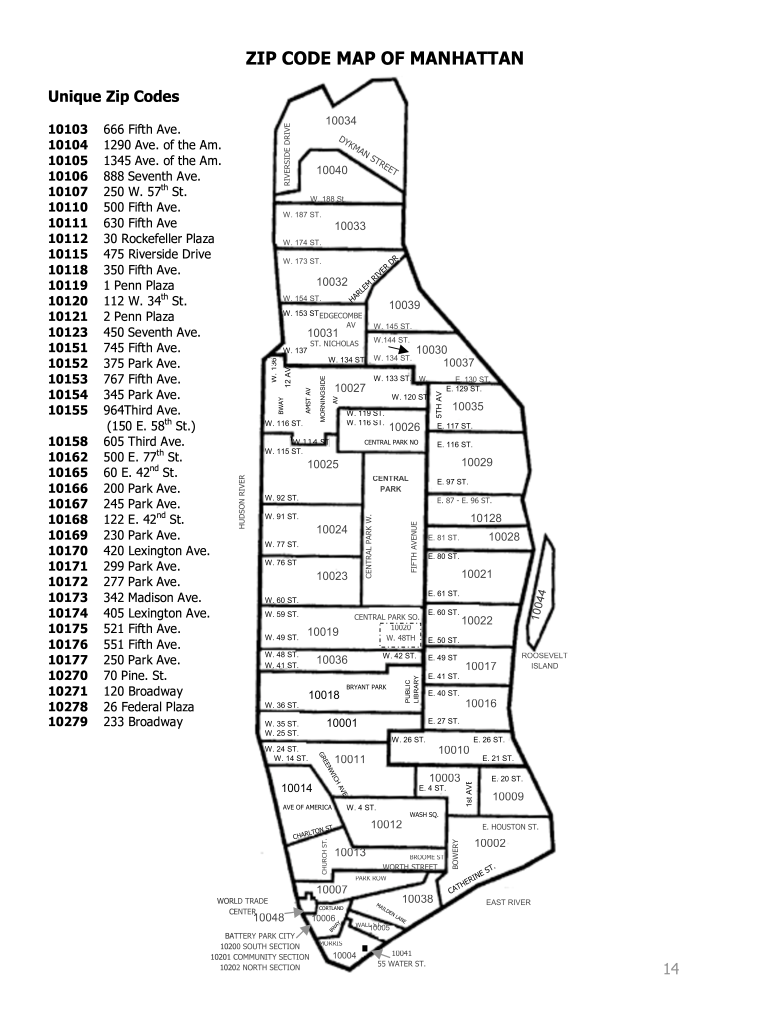

### As of the 2024 plan: All streets below 60th street, excluding FDR Drive, West Street, and Hugh L Carey Tunnel 

FDR Drive and West Street are not a part of the congestion zone but are still valuable sources of data for the investigation, and are thus included. 

Hugh L Carey Tunnel is also not part of the congestion zone, and would be an important source of data. But it has been excluded due to obviously inaccurate data.

In [46]:
# Create list of zipcodes to exclude

zips_above60 = [
    10021,
    10023,
    10024,
    10025,
    10026,
    10027,
    10028,
    10029,
    10030,
    10031,
    10032,
    10033,
    10034,
    10035,
    10037,
    10039,
    10040,
    10044, #Roosevelt Island
    10128

]

Plot Manhattan map

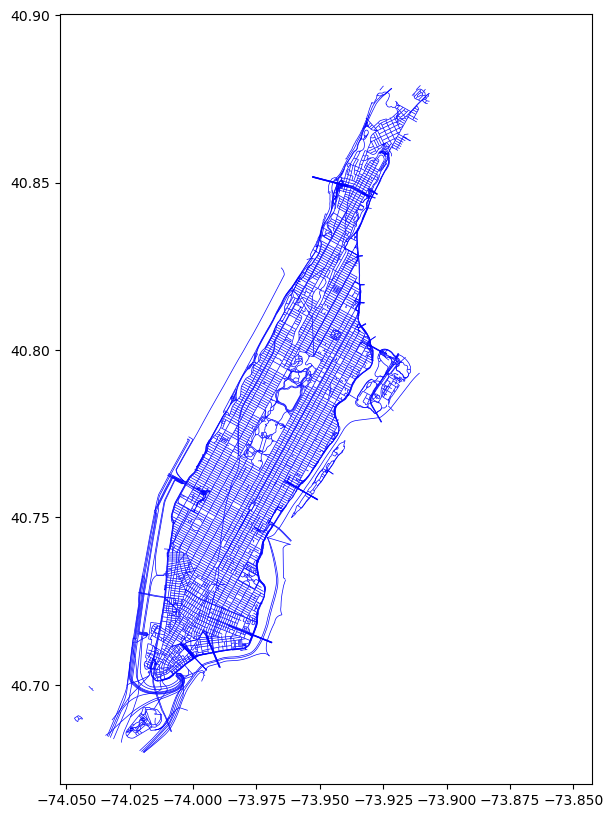

In [39]:
# Calculate the center of the bounding box
center_x = Manhattan_json.total_bounds[0] + (Manhattan_json.total_bounds[2] - centerline.total_bounds[0]) / 2
center_y = Manhattan_json.total_bounds[1] + (Manhattan_json.total_bounds[3] - centerline.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
Manhattan_json.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)

# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.18, center_x + 0.03])
ax.set_ylim([center_y - 0.2, center_y + 0.03])

plt.show()

Identify zipcodes included in Manhattan map and datatype (string)

In [42]:
#Five-digit postal zip code for the right side of the street segment, 
#relative to the digitized direction
of the segment.
Manhattan_json['r_zip'].unique()

array(['10280', '10004', '10005', '10006', '10038', '10007', '10041',
       '10013', '10025', '10024', '10023', '10019', '10036', '10018',
       '10001', '10011', '10014', '10282', '10069', '10027', '10031',
       '10032', '10033', None, '10034', '10271', '10278', '10012',
       '10003', '10002', '10010', '10020', '10119', '10009', '10016',
       '10017', '10022', '10065', '10021', '10075', '10028', '10128',
       '10029', '10035', '10000', '10037', '10177', '10167', '10172',
       '10171', '10152', '10166', '10178', '10040', '10115', '10174',
       '10158', '10039', '10030', '10026', '10044', '10463', '10112',
       '10155', '10165', '10045', '10162', '10111', '10281', '10453',
       '10103', '10048', '10080', '00083', '10451', '10175', '10176',
       '10118', '10454', '11201', '11249', '10169'], dtype=object)

In [45]:
#Five-digit postal zip code for the left side of the street segment, 
#relative to the digitized direction
Manhattan_json['l_zip'].unique()

array(['10280', '10004', '10005', '10006', '10038', '10007', '10013',
       '10048', '10025', '10024', '10023', '10019', '10036', '10018',
       '10001', '10011', '10014', '10282', '10069', '10027', '10031',
       '10032', '10033', None, '10034', '10279', '10012', '10003',
       '10002', '10010', '10020', '10105', '10121', '10106', '10009',
       '10016', '10017', '10022', '10065', '10021', '10075', '10028',
       '10128', '10029', '10035', '10118', '10103', '10026', '10000',
       '10037', '10177', '10167', '10172', '10171', '10152', '10040',
       '10115', '10170', '10154', '10173', '10039', '10030', '10044',
       '10463', '10112', '10281', '10453', '10119', '10080', '00083',
       '10451', '10110', '10120', '10454', '11201', '11249', '10169'],
      dtype=object)

Convert zips_above60 to a list of string values to use in filtering:

In [66]:
zips_above60_str = [str(x) for x in zips_above60]

In [323]:
czone_json = Manhattan_json[~Manhattan_json['r_zip'].isin(zips_above60_str)]

Confirm if streets with NA zipcode should be incuded or excluded from the map

In [73]:
czone_json[czone_json['r_zip'].isna()]['st_name'].unique()

array(['HENRY HUDSON', 'BROOKLYN BRIDGE EXIT RAMP',
       'FRANKLIN D ROOSEVELT', 'CONNECTOR', 'CROSS BRONX',
       'ED KOCH QUEENSBORO', 'THOMAS JEFFERSON PARK', 'UNNAMED',
       'PEDESTRIAN', 'MANHATTAN BRIDGE PEDESTRIAN',
       'MANHATTAN BRIDGE BIKE PATH', 'RFK BRIDGE BRONX PED AND BIKE PATH',
       'GW BRIDGE BIKE AND PEDESTRIAN', 'AMTRAK',
       'EDGEWATER-MIDTOWN WEST FERRY', 'PORT IMPERIAL-MIDTOWN W FRY',
       'PEDESTRIAN AND BIKE PATH LINK', 'HBKN 14 ST-MIDTOWN W FRY',
       'PAULUS HOOK-MIDTOWN W FERRY', 'LINCOLN HARBOR-MIDTOWN W FRY',
       'BELFORD-MIDTOWN WEST FERRY', 'PORT IMPERIAL-WFC FERRY',
       'HBKN 14 ST-WFC FERRY', 'HOBOKEN TRML-WFC FERRY',
       'PAULUS HOOK-WFC FERRY', 'LIBERTY-ELLIS ISLANDS FERRY',
       'BELFORD-WFC FERRY', 'GOVERNORS ISLAND FERRY ROUTE',
       'PORT IMPERIAL-WALL ST FERRY', 'STATEN ISLAND FERRY ROUTE',
       'HOBOKEN TRML-WALL ST FERRY', 'PAULUS HOOK-WALL ST FERRY',
       'PORT LIBERTE-WALL ST FERRY', 'BELFORD-WALL STREET FERR

Exclude map features with NA Zipcode (mostly non-road infrastructure)

In [543]:
zips_above60_str.append(None)
czone_json = Manhattan_json[~Manhattan_json['r_zip'].isin(zips_above60_str)]

Confirm operation with mapping

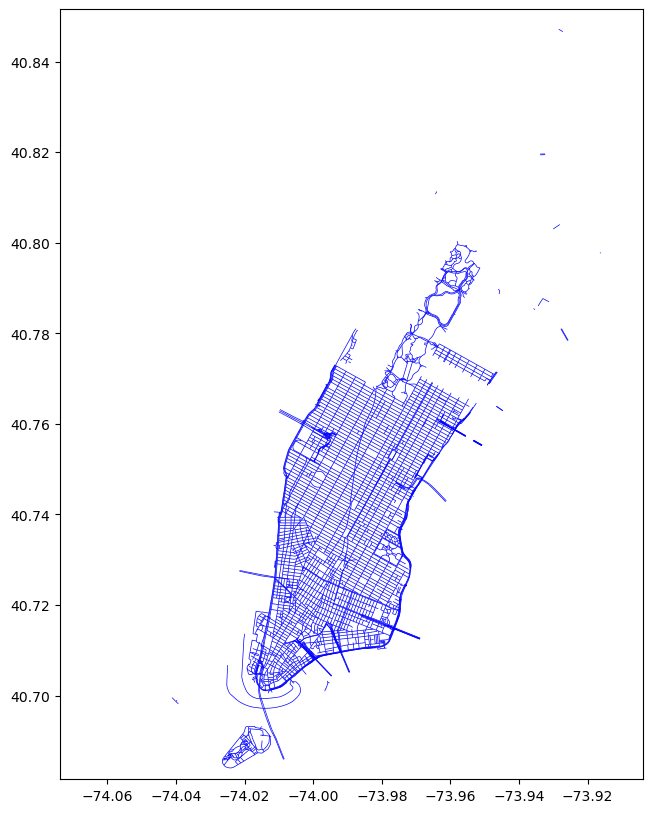

In [325]:

center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
czone_json.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)

# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.1, center_x + 0.07])
ax.set_ylim([center_y - 0.1, center_y + 0.07])

plt.show()

Identify remianing zipcodes which can be reduced:

In [79]:
czone_json['r_zip'].unique()

array(['10280', '10004', '10005', '10006', '10038', '10007', '10041',
       '10013', '10019', '10036', '10018', '10001', '10011', '10014',
       '10282', '10069', '10271', '10278', '10012', '10003', '10002',
       '10010', '10020', '10119', '10009', '10016', '10017', '10022',
       '10065', '10075', '10000', '10177', '10167', '10172', '10171',
       '10152', '10166', '10178', '10115', '10174', '10158', '10463',
       '10112', '10155', '10165', '10045', '10162', '10111', '10281',
       '10453', '10103', '10048', '10080', '00083', '10451', '10175',
       '10176', '10118', '10454', '11201', '11249', '10169'], dtype=object)

In [163]:
czone_json[czone_json['r_zip'].isin(sus_zips2)]['st_name'].unique()

array(['BATTERY', 'THAMES', '1', 'ALBANY', 'WEST', 'RIVER', 'WARREN',
       'END', 'RECTOR', 'CHAMBERS', '2', 'MURRAY', 'VESEY', 'PARK', '3',
       'CONNECTOR', 'TRIBECA', 'BATTERY PARK GREENWAY',
       'BATTERY PARK CITY GREENWAY', 'HUDSON RIVER GREENWAY', 'LIBERTY',
       'PEDESTRIAN AND BIKE PATH LINK', 'RECTOR PL-RECTOR ST PED',
       'NORTH COVE BIKE PATH', 'BATTERY PARK UNDERPASS',
       'HUGH L CAREY TUNNEL', 'ROBERT R DOUGLASS PEDESTRIAN'],
      dtype=object)

In [326]:
#Compare the unique zipcodes left in czone_json['r_zip'] after the first zip reduction
#Add zipcodes that don't appear on the map to sus_zips to investigate

sus_zips = ['10280', '10282', '10069', '10065', '10075', '10000',  
       '10463', '10281', '10453', '00083', '10451',
       '10454', '10041']

# '10000', '00083' is central park
# '10280', '10281', '10282' : Piers
# '11249' Brooklyn Bridge

'''sus_zips2 will be drawn in red to contrast with blue map, allowing investigation into
which zipcodes correspond with which streets. Contrast wit sus_zips'''

sus_zips2 = ['10115', '10162', '11201']
        
#suszip_json = czone_json[czone_json['r_zip'].isin(sus_zips)]    
suszip_json3 = czone_json[czone_json['r_zip'].isin(sus_zips3)]
suszip_json2 = czone_json[czone_json['r_zip'].isin(sus_zips2)]

In [327]:
sus_zips3 = [   

    '10115', '10162', '11201',
]

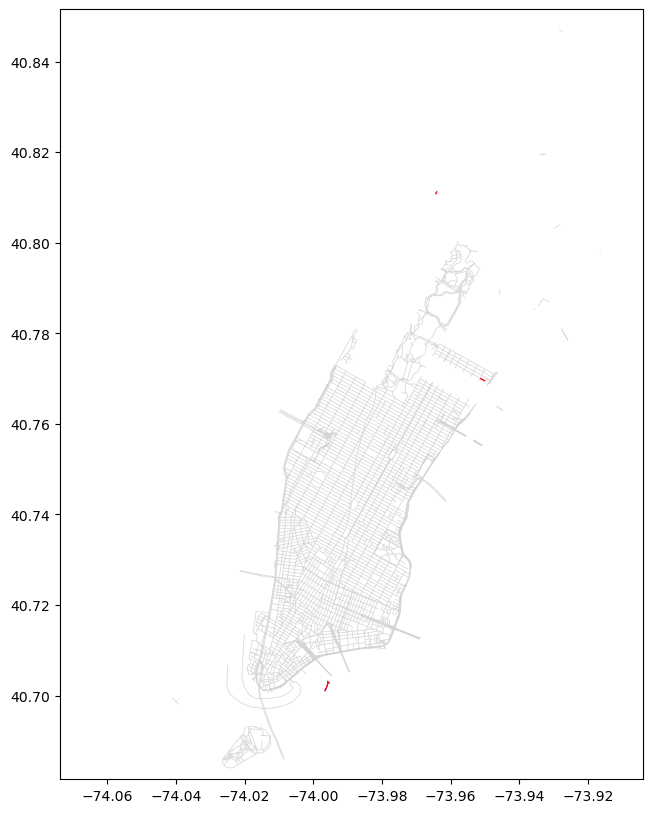

In [328]:
#Map sus_zips to visualize unaccounted for zipcodes

center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
czone_json.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
suszip_json3.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)
suszip_json2.plot(ax=ax, color='red', edgecolor='black', linewidth=0.9)

# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.1, center_x + 0.07])
ax.set_ylim([center_y - 0.1, center_y + 0.07])

plt.show()

In [544]:
czone_json = czone_json[~czone_json['r_zip'].isin(sus_zips)]
czone_json = czone_json[~czone_json['r_zip'].isin(sus_zips2)]
czone_json = czone_json[~czone_json['r_zip'].isin(sus_zips3)]

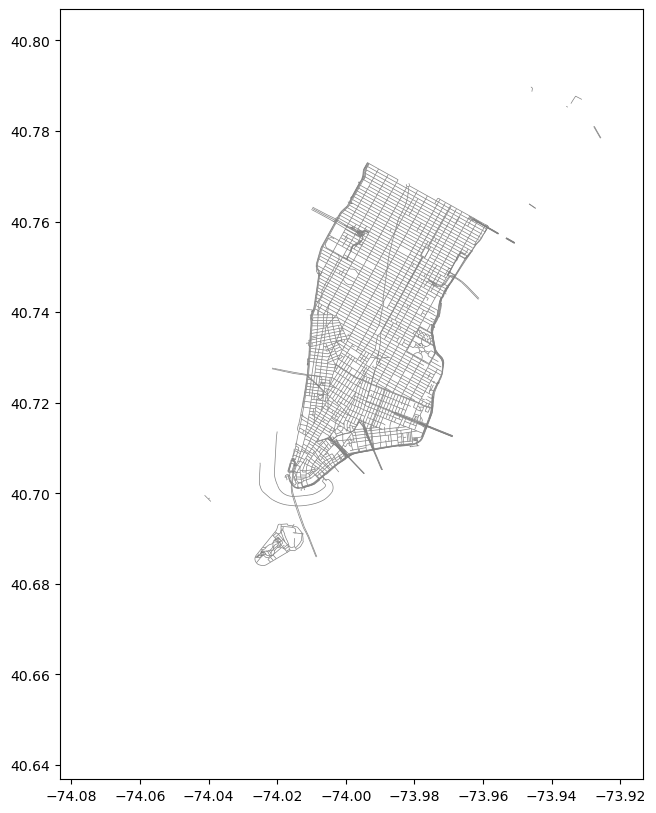

In [467]:
#Confirm operation with mapping

center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
czone_json.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)



# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.1, center_x + 0.07])
ax.set_ylim([center_y - 0.1, center_y + 0.07])

plt.show()

## Trim rest of the map by eye using geographic axis coordinates:

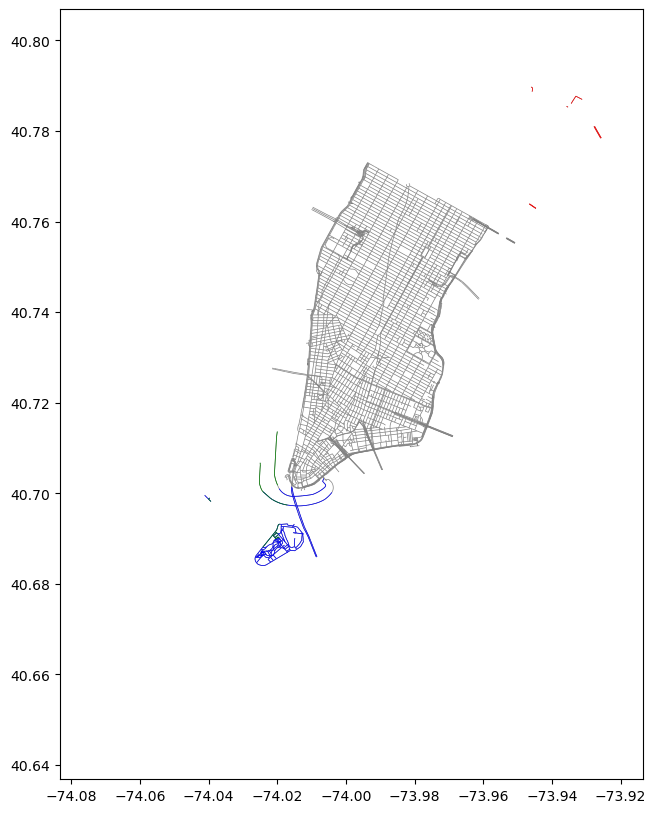

In [346]:
#Confirm operation with mapping

center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
czone_json.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)

#Specify filter coordinates using bounding box
filtered_czone_json1 = czone_json.cx[-73.95:-73.92, 40.76:40.80]
filtered_czone_json1.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)

filtered_czone_json2 = czone_json.cx[-74.06:-73.99, 40.64:40.70]
filtered_czone_json2.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)

filtered_czone_json3 = czone_json.cx[-74.04:-74.02, 40.69:40.72]
filtered_czone_json3.plot(ax=ax, color='green', edgecolor='black', linewidth=0.5)

# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.1, center_x + 0.07])
ax.set_ylim([center_y - 0.1, center_y + 0.07])

plt.show()

In [545]:
#Remove excessive geometries

czone_json = czone_json[~czone_json['geometry'].isin(filtered_czone_json1['geometry'])]
czone_json = czone_json[~czone_json['geometry'].isin(filtered_czone_json2['geometry'])]
czone_json = czone_json[~czone_json['geometry'].isin(filtered_czone_json3['geometry'])]

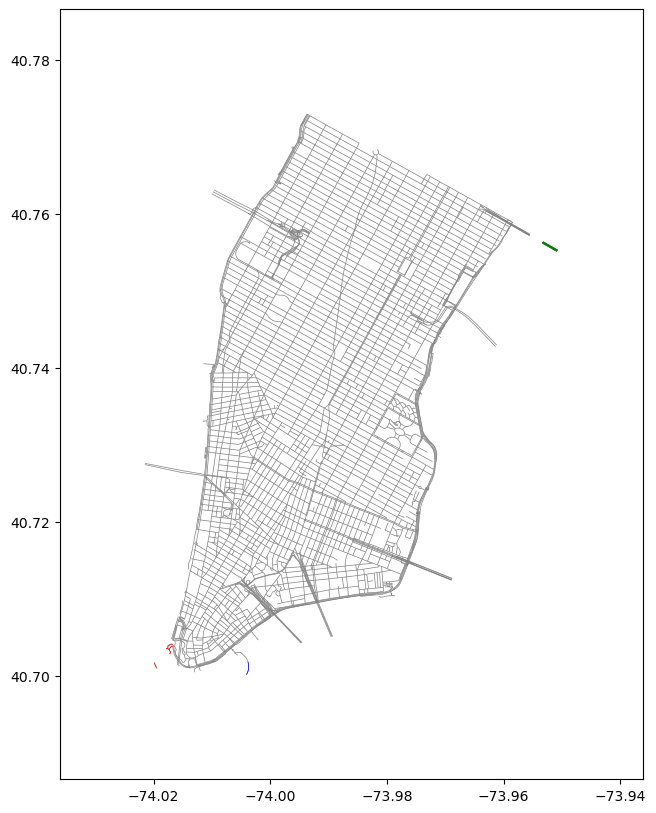

In [546]:
#Confirm operation with mapping

center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
czone_json.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)


# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.05, center_x + 0.05])
ax.set_ylim([center_y - 0.05, center_y + 0.05])


#Clean up minor details:

filtered_czone_json4 = czone_json.cx[-74.03:-74.017, 40.69:40.715]
filtered_czone_json4.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)

filtered_czone_json5 = czone_json.cx[-74.01:-74.00, 40.69:40.701]
filtered_czone_json5.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)

filtered_czone_json6 = czone_json.cx[-73.955:-73.94, 40.76:40.75]
filtered_czone_json6.plot(ax=ax, color='green', edgecolor='black', linewidth=0.5)

plt.show()

In [547]:
#Remove last unecessary geometries

czone_json = czone_json[~czone_json['geometry'].isin(filtered_czone_json4['geometry'])]
czone_json = czone_json[~czone_json['geometry'].isin(filtered_czone_json5['geometry'])]
czone_json = czone_json[~czone_json['geometry'].isin(filtered_czone_json6['geometry'])]

## Now that the map is refined to the congestion zone, format names:

In [390]:
czone_json['st_name'].unique()

array(['BATTERY', 'HUGH L CAREY', 'BROAD', 'ALBANY', 'MORRIS', 'STATE',
       'GREENWICH', 'TRINITY', 'PEARL', 'WATER', 'WHITEHALL', 'RECTOR',
       'BEAVER', 'CHURCH', 'WALL', '12', '11', 'WEST', 'WASHINGTON',
       'STONE', 'BROADWAY', 'HOLLAND', 'HOLLAND TUNNEL EXIT',
       'HOLLAND TUNNEL EXIT 1', 'HOLLAND TUNNEL EXIT 2',
       'HOLLAND TUNNEL EXIT 3', 'HOLLAND TUNNEL EXIT 5', 'CORTLANDT',
       'EXCHANGE', 'WATTS', 'COLLISTER', 'HUDSON', 'CHARLES', 'CANAL',
       'JANE', 'BARROW', 'COMMERCE', 'HANOVER', 'RENWICK', '10',
       'BEEKMAN', 'MOORE', 'VARICK', 'MAIDEN', '17', 'GOUVERNEUR',
       'HOLLAND TUNNEL EXIT PED', 'FULTON', 'FRONT', 'FLETCHER',
       'CHRISTOPHER', 'PERRY', 'WILLIAM', 'ANN',
       'HOLLAND TUNNEL ENTRANCE WATTS ST', 'HOLLAND TUNNEL ENTRANCE',
       'HOLLAND TUNNEL EN VARICK ST', 'HOLLAND TUNNEL ENTRANCE CANAL ST',
       'HOLLAND TUNNEL EN HUDSON ST', '18', 'VESTRY', 'TRIMBLE', 'GROVE',
       'CLARKSON', 'PARK', 'WALKER', 'FRANKLIN', '7', 'OF THE A

In [391]:
czone_json['st_label'].unique()

array(['BATTERY PL', 'HUGH L CAREY TUNL', 'BROAD ST', 'ALBANY ST',
       'MORRIS ST', 'STATE ST', 'GREENWICH ST', 'TRINITY PL', 'PEARL ST',
       'WATER ST', 'WHITEHALL ST', 'RECTOR ST', 'BEAVER ST', 'CHURCH ST',
       'WALL ST', '12 AVE', '11 AVE', 'WEST ST', 'WASHINGTON ST',
       'STONE ST', 'BROADWAY', 'W BROADWAY', 'HOLLAND TUNL',
       'HOLLAND TUNNEL EXIT', 'HOLLAND TUNNEL EXIT 1',
       'HOLLAND TUNNEL EXIT 2', 'HOLLAND TUNNEL EXIT 3',
       'HOLLAND TUNNEL EXIT 5', 'CORTLANDT ST', 'EXCHANGE PL', 'WATTS ST',
       'COLLISTER ST', 'HUDSON ST', 'CHARLES ST', 'CANAL ST', 'JANE ST',
       'BARROW ST', 'COMMERCE ST', 'HANOVER ST', 'RENWICK ST', 'W 10 ST',
       'BEEKMAN ST', 'N MOORE ST', 'VARICK ST', 'MAIDEN LN', 'W 17 ST',
       'GOUVERNEUR LN', 'HOLLAND TUNNEL EXIT PED OPAS', 'FULTON ST',
       'FRONT ST', 'FLETCHER ST', 'CHRISTOPHER ST', 'PERRY ST',
       'WILLIAM ST', 'ANN ST', 'HOLLAND TUNNEL ENTRANCE WATTS ST',
       'HOLLAND TUNNEL ENTRANCE', 'HOLLAND TUNNEL EN

In [392]:
Manhattan_traffic['street'].unique()

array(['BROADWAY', 'CANAL ST', '7 AV', 'AMSTERDAM AV', 'E HOUSTON ST',
       'AMSTERDAM AVENUE', 'AVE OF THE AMERICAS', 'PARK AV', 'BOWERY',
       'EAST HOUSTON STREET', 'WEST 225 STREET', 'EDGECOMBE AVENUE',
       '1 AVENUE', 'EAST 59 STREET', 'EAST 57 STREET', 'EAST 60 STREET',
       'EAST 55 STREET', 'EAST 56 STREET', 'EAST 58 STREET',
       'SPRING STREET', 'WASHINGTON STREET', 'BANK STREET',
       'MORTON STREET', 'ROOSEVELT IS BRIDGE', 'CLINTON STREET',
       'WILLIAM STREET', 'NASSAU STREET', 'CHERRY STREET',
       'WEST 34 STREET', 'WEST 60 STREET', 'WEST 58 STREET',
       'WEST 62 STREET', 'WEST 64 STREET', 'WEST 63 STREET',
       'WEST 125 STREET', 'EAST 125 STREET', 'WEST 126 STREET',
       'EAST 126 STREET', 'EAST 124 STREET', 'WEST 124 STREET',
       '5 AVENUE', 'TERRACE DRIVE', 'EAST 11 STREET', '4 AVENUE',
       'DELANCEY STREET', 'C P 7 AVENUE APPROACH', 'CENTER DRIVE',
       'CPW 72 APPROACH', 'WEST 14 STREET', '7 AVENUE', 'WEST 26 STREET',
       'GROVE 

In [444]:
#Identify numeric values of street names to exclude those over 60

Manhattan_traffic['NumericValue'] = Manhattan_traffic['street'].str.extract('(\d+)').astype(float)

#Create new data set for the congestion_zone having filtered streets with numeric val > 60
congestion_zone = Manhattan_traffic[(Manhattan_traffic['NumericValue'] < 60) | (Manhattan_traffic['NumericValue'].isna())]

#confirm the operation
congestion_zone['street'].unique()

array(['BROADWAY', 'CANAL ST', '7 AV', 'AMSTERDAM AV', 'E HOUSTON ST',
       'AMSTERDAM AVENUE', 'AVE OF THE AMERICAS', 'PARK AV', 'BOWERY',
       'EAST HOUSTON STREET', 'EDGECOMBE AVENUE', '1 AVENUE',
       'EAST 59 STREET', 'EAST 57 STREET', 'EAST 55 STREET',
       'EAST 56 STREET', 'EAST 58 STREET', 'SPRING STREET',
       'WASHINGTON STREET', 'BANK STREET', 'MORTON STREET',
       'ROOSEVELT IS BRIDGE', 'CLINTON STREET', 'WILLIAM STREET',
       'NASSAU STREET', 'CHERRY STREET', 'WEST 34 STREET',
       'WEST 58 STREET', '5 AVENUE', 'TERRACE DRIVE', 'EAST 11 STREET',
       '4 AVENUE', 'DELANCEY STREET', 'C P 7 AVENUE APPROACH',
       'CENTER DRIVE', 'WEST 14 STREET', '7 AVENUE', 'WEST 26 STREET',
       'GROVE STREET', 'VARICK STREET', 'LEROY STREET', 'WEST 15 STREET',
       'WEST 11 STREET', 'DOWNING STREET', 'BLEECKER STREET',
       'CHRISTOPHER STREET', '7 AVENUE SOUTH', 'WAVERLY PLACE',
       'WEST 10 STREET', 'PERRY STREET', 'CLARKSON STREET',
       'WEST HOUSTON STR

## To format street names, make czone_json 'st_name' value the same as their congestion_zone 'street' value

## This approach allows 'st_label' to remain in czone_json as a remnant of the original naming scheme (useful to correct errors)

## 'STREET' and 'AVENUE' Should be added to the value of 'st_name' based on the presence of 'ST' and 'AV' in 'st_label'

## 'WEST' and 'EAST' Should be added to the start of 'st_name' based on the presence of 'W' and 'E' in 'st_label'

### Few cases need correcting in congestion_zone:

 - E HOUSTON ST --> E HOUSTON STREET
 - CANAL ST --> CANAL STREET
 - 7 AV --> 7 AVENUE
 - PARK AV --> PARK AVENUE
 - There may be more...
 - AMSTERDAM AV & AMSTERDAM AVENUE distinction?
 
 
 ## --> Reminder, After this name alignment, streets in the traffic dataset are reduced to those in the geojson data set as a way of effectively parsing which are below 60th street

Step 1: Find errors in naming scheme of congestion_zone:
- Set up Regular Expressions

In [445]:
suffixes = ['ST', 'AV', 'STREET', 'AVENUE']
prefixes = ['E', 'W']

# Create regular expressions for the suffixes and prefixes
suffix_regexes = {suffix: re.compile(rf'\s{suffix}$') for suffix in suffixes}
prefix_regexes = {prefix: re.compile(rf'^{prefix}\s') for prefix in prefixes}


In [411]:
ST_zone = congestion_zone[congestion_zone['street'].str.contains(suffix_regexes['ST'])]
AV_zone = congestion_zone[congestion_zone['street'].str.contains(suffix_regexes['AV'])]

In [413]:
ST_zone['street'].unique()

array(['CANAL ST', 'E HOUSTON ST', 'FDR DRIVE NB ENTRANCE E 34 ST'],
      dtype=object)

In [446]:
#Replace the values:
congestion_zone.loc[congestion_zone['street'].str.contains(suffix_regexes['ST']), 'street'] = congestion_zone['street'].str.replace(suffix_regexes['ST'], ' STREET', regex=True)

In [447]:
congestion_zone.loc[congestion_zone['street'].str.contains(suffix_regexes['AV']), 'street'] = congestion_zone['street'].str.replace(suffix_regexes['AV'], ' AVENUE', regex=True)

In [418]:
#Confirm operation
STREET_zone = congestion_zone[congestion_zone['street'].str.contains(suffix_regexes['STREET'])]
STREET_zone['street'].unique()

array(['EAST HOUSTON STREET', 'EAST 59 STREET', 'EAST 57 STREET',
       'EAST 55 STREET', 'EAST 56 STREET', 'EAST 58 STREET',
       'SPRING STREET', 'WASHINGTON STREET', 'BANK STREET',
       'MORTON STREET', 'CLINTON STREET', 'WILLIAM STREET',
       'NASSAU STREET', 'CHERRY STREET', 'WEST 34 STREET',
       'WEST 58 STREET', 'EAST 11 STREET', 'DELANCEY STREET',
       'WEST 14 STREET', 'WEST 26 STREET', 'GROVE STREET',
       'VARICK STREET', 'LEROY STREET', 'WEST 15 STREET',
       'WEST 11 STREET', 'DOWNING STREET', 'BLEECKER STREET',
       'CHRISTOPHER STREET', 'WEST 10 STREET', 'PERRY STREET',
       'CLARKSON STREET', 'WEST HOUSTON STREET', 'COMMERCE STREET',
       'BEDFORD STREET', 'WEST 31 STREET', 'CHARLES STREET',
       'WEST 24 STREET', 'WEST 23 STREET', 'CARMINE STREET',
       'GREENWICH STREET', 'EDGAR STREET', 'CANAL STREET',
       'LIBERTY STREET', 'HUDSON STREET', 'WEST 29 STREET',
       'GRAND STREET', 'BROOME STREET', 'CHAMBERS STREET',
       'LAFAYETTE STRE

In [421]:
#Confirm operation
AVENUE_zone = congestion_zone[congestion_zone['street'].str.contains(suffix_regexes['AVENUE'])]
AVENUE_zone['street'].unique()

array(['AMSTERDAM AVENUE', 'EDGECOMBE AVENUE', '1 AVENUE', '5 AVENUE',
       '4 AVENUE', '7 AVENUE', 'GREENWICH AVENUE', 'SEAMAN AVENUE',
       '3 AVENUE', 'AUDUBON AVENUE', '2 AVENUE', 'MADISON AVENUE',
       '10 AVENUE', '9 AVENUE', '11 AVENUE', 'COLUMBUS AVENUE',
       'YORK AVENUE', 'WADSWORTH AVENUE', 'MORNINGSIDE AVENUE',
       '8 AVENUE', 'PARK AVENUE', 'ST NICHOLAS AVENUE',
       'LEXINGTON AVENUE', 'WEST END AVENUE', '12 AVENUE',
       'MANHATTAN AVENUE', 'NORTH END AVENUE', 'FT WASHINGTON AVENUE',
       'LENOX AVENUE'], dtype=object)

## Step 2: Sort values of st_label in czone_json by prefix and suffix using regular expressions

In [550]:
czone_json.loc[czone_json['st_name'] == "FDR", 'st_name'] = "F D R DRIVE"

one_word_pattern = re.compile(r'^\w+$|^.$')
    
for idx, row in czone_json.iterrows():
    if re.match(one_word_pattern, row['st_name']):
        czone_json.loc[idx, 'st_name'] = row['st_label']



In [572]:
suffixes = ['ST', 'AVE', 'PL', 'W', 'BRG', 'SQR', 'LN', 'DR', 'S', 'TUNL', 'PLZ', 'SQ', 'W', 'E', 'N', 'CT', 'ALY', 'CIRC']
prefixes = ['E', 'W', 'S', 'N', 'AVE']

# Create regular expressions for the suffixes and prefixes
suffix_regexes = {suffix: re.compile(rf'\s{suffix}$') for suffix in suffixes}
prefix_regexes = {prefix: re.compile(rf'^{prefix}\s') for prefix in prefixes}

In [552]:
# Create new DataFrames based on suffixes
ST_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['ST'])]
AVE_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['AVE'])]
PL_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['PL'])]
BRG_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['BRG'])]
LN_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['LN'])]
DR_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['DR'])]
S_json = czone_json[czone_json['st_label'].str.contains(suffix_regexes['S'])]

# Create new DataFrame based on prefixes
E_json = czone_json[czone_json['st_label'].str.contains(prefix_regexes['E'])]
W_json = czone_json[czone_json['st_label'].str.contains(prefix_regexes['W'])]

# Create a DataFrame for the remaining rows that do not match any of the above
all_matched_indexes = pd.concat([df.index.to_series() for df in [ST_json, AVE_json, PL_json, W_json, BRG_json, SQR_json, LN_json, DR_json, E_json]])
other_json = czone_json[~czone_json.index.isin(all_matched_indexes)]

In [554]:
#Replace st_name with st_label + full suffix replaced
def replace_values(df, pattern, replacement):
    mask = df['st_label'].str.contains(pattern)
    df.loc[mask, 'st_name'] = df.loc[mask, 'st_label'].str.replace(pattern, replacement, regex=True)

In [555]:
#Replace suffixes

replace_values(czone_json, suffix_regexes['ST'], ' STREET')
replace_values(czone_json, suffix_regexes['AVE'], ' AVENUE')
replace_values(czone_json, suffix_regexes['PL'], ' PLACE')
replace_values(czone_json, suffix_regexes['BRG'], ' BRIDGE')
replace_values(czone_json, suffix_regexes['LN'], ' LANE')
replace_values(czone_json, suffix_regexes['DR'], ' DRIVE')
replace_values(czone_json, suffix_regexes['S'], ' SOUTH')
replace_values(czone_json, suffix_regexes['TUNL'], ' TUNNEL')
replace_values(czone_json, suffix_regexes['PLZ'], ' PLAZA')
replace_values(czone_json, suffix_regexes['SQ'], ' SQUARE')
replace_values(czone_json, suffix_regexes['W'], ' WEST')
replace_values(czone_json, suffix_regexes['E'], ' EAST')
replace_values(czone_json, suffix_regexes['N'], ' NORTH')
replace_values(czone_json, suffix_regexes['CT'], ' COURT')
replace_values(czone_json, suffix_regexes['CIRC'], ' CIRC')
replace_values(czone_json, suffix_regexes['ALY'], ' ALLEY')

In [556]:
#Use a different function to change prefix to not undo suffix changes
def replace_values_stname(df, pattern, replacement):
    mask = df['st_name'].str.contains(pattern)
    df.loc[mask, 'st_name'] = df.loc[mask, 'st_name'].str.replace(pattern, replacement, regex=True)


In [573]:
#Replace prefixes

replace_values_stname(czone_json, prefix_regexes['E'], 'EAST ')
replace_values_stname(czone_json, prefix_regexes['W'], 'WEST ')
replace_values_stname(czone_json, prefix_regexes['N'], 'NORTH ')
replace_values_stname(czone_json, prefix_regexes['S'], 'SOUTH ')
replace_values_stname(czone_json, prefix_regexes['AVE'], 'AVENUE ')

In [586]:
#examine results
sorted(czone_json['st_name'].unique())

['1 AVENUE',
 '10 AVENUE',
 '10 STREET PEDESTRIAN',
 '11 AVENUE',
 '12 AVENUE',
 '14 STREET',
 '2 AVENUE',
 '20 ST LOOP',
 '25 STREET PEDESTRIAN',
 '3 AVENUE',
 '4 AVENUE',
 '46 ST PEDESTRIAN',
 '47 STREET BIKE',
 '5 AVENUE',
 '51 STREET PEDESTRIAN',
 '6 1/2 AVENUE',
 '60 ST PEDESTRIAN',
 '7 AVENUE',
 '7 AVENUE SOUTH',
 '8 AVENUE',
 '9 AVENUE',
 'ABRAHAM KAZAN STREET',
 'ALBANY STREET',
 'ALLEN STREET',
 'ALLEY',
 'ANN STREET',
 'ASSER LEVY PLACE',
 'ASTOR PLACE',
 'ATTORNEY STREET',
 'AVENUE A',
 'AVENUE B',
 'AVENUE C',
 'AVENUE C LOOP',
 'AVENUE D',
 'AVENUE OF THE AMERICAS',
 'AVENUE OF THE FINEST',
 'BANK STREET',
 'BARCLAY STREET',
 'BARROW STREET',
 'BARUCH DRIVE',
 'BARUCH PLACE',
 'BATTERY PARK',
 'BATTERY PARK GREENWAY',
 'BATTERY PARK UNDERPASS',
 'BATTERY PLACE',
 'BAXTER STREET',
 'BAYARD STREET',
 'BEACH STREET',
 'BEAVER STREET',
 'BEDFORD STREET',
 'BEEKMAN PLACE',
 'BEEKMAN STREET',
 'BENSON PLACE',
 'BETHUNE STREET',
 'BIALYSTOKER PLACE',
 'BIKE PATH',
 'BK BATTERY TN

In [606]:
czone_json.loc[czone_json['st_name'] == "BROOKLYN BRIDGE ENTRANCE RAMP", 'st_name'] = "BROOKLYN BRIDGE APPROACH"

In [607]:
czone_json.loc[czone_json['st_name'] == "COLUMBUS CIR", 'st_name'] = "COLUMBUS CIRCLE"

In [577]:
#Curate individual name replacements:

czone_json.loc[czone_json['st_name'] == "OF THE AMERICAS", 'st_name'] = "AVENUE OF THE AMERICAS"
czone_json.loc[czone_json['st_name'] == "OF THE FINEST", 'st_name'] = "AVENUE OF THE FINEST"
czone_json.loc[czone_json['st_name'] == "14 ST LOOP", 'st_name'] = "14 STREET"
czone_json.loc[czone_json['st_name'] == "1 AVE LOOP", 'st_name'] = "1 AVENUE"
czone_json.loc[czone_json['st_name'] == "AVE C LOOP", 'st_name'] = "AVE C"
czone_json.loc[czone_json['st_name'] == "WASHINGTON SQ WEST", 'st_name'] = "WASHINGTON SQUARE WEST"
czone_json.loc[czone_json['st_name'] == "WASHINGTON SQ SOUTH", 'st_name'] = "WASHINGTON SQUARE SOUTH"
czone_json.loc[czone_json['st_name'] == "WASHINGTON SQ NORTH", 'st_name'] = "WASHINGTON SQUARE NORTH"
czone_json.loc[czone_json['st_name'] == "WASHINGTON SQ EAST", 'st_name'] = "WASHINGTON SQUARE EAST"
czone_json.loc[czone_json['st_name'] == "UNION SQ EAST", 'st_name'] = "UNION SQUARE EAST"
czone_json.loc[czone_json['st_name'] == "UNION SQ WEST", 'st_name'] = "UNION SQUARE WEST"
czone_json.loc[czone_json['st_name'] == "UNION SQ NORTH", 'st_name'] = "UNION SQUARE NORTH"
czone_json.loc[czone_json['st_name'] == "UNION SQ SOUTH", 'st_name'] = "UNION SQUARE SOUTH"
czone_json.loc[czone_json['st_name'] == "SUTTON PL SOUTH", 'st_name'] = "SUTTON PLACE SOUTH"
czone_json.loc[czone_json['st_name'] == "7 AVE SOUTH", 'st_name'] = "7 AVENUE SOUTH"
czone_json.loc[czone_json['st_name'] == "PARK AVE SOUTH", 'st_name'] = "PARK AVENUE SOUTH"

## Step 3: find direct matches between czone_json and congestion_zone names:

In [642]:
json_streets = czone_json['st_name'].unique()
traffic_streets = congestion_zone['street'].unique()

json_non_matches = czone_json[~czone_json['st_name'].isin(traffic_streets)]
json_matches = czone_json[czone_json['st_name'].isin(traffic_streets)]

print(len(json_streets))
print(len(json_non_matches['st_name'].unique()))

555
343


In [636]:
sorted(json_non_matches['st_name'].unique())

['10 STREET PEDESTRIAN',
 '14 STREET',
 '20 ST LOOP',
 '25 STREET PEDESTRIAN',
 '46 ST PEDESTRIAN',
 '47 STREET BIKE',
 '51 STREET PEDESTRIAN',
 '6 1/2 AVENUE',
 '60 ST PEDESTRIAN',
 'ABRAHAM KAZAN STREET',
 'ALBANY STREET',
 'ALLEY',
 'ANN STREET',
 'ASSER LEVY PLACE',
 'ASTOR PLACE',
 'ATTORNEY STREET',
 'AVENUE C LOOP',
 'AVENUE OF THE FINEST',
 'BARROW STREET',
 'BARUCH DRIVE',
 'BARUCH PLACE',
 'BATTERY PARK',
 'BATTERY PARK GREENWAY',
 'BATTERY PARK UNDERPASS',
 'BAXTER STREET',
 'BAYARD STREET',
 'BEEKMAN PLACE',
 'BEEKMAN STREET',
 'BENSON PLACE',
 'BETHUNE STREET',
 'BIKE PATH',
 'BK BATTERY TNNL PEDESTRIAN',
 'BLOOMFIELD STREET',
 'BOND STREET',
 'BOWLING GREEN',
 'BRIDGE STREET',
 'BROADWAY ALLEY',
 'BROOKLYN BRIDGE EN RP FDR DRIVE',
 'BROOKLYN BRIDGE EN RP PEARL STREET',
 'BROOKLYN BRIDGE EXIT RAMP',
 'BROOKLYN BRIDGE PED AND BIKE',
 'CANNON STREET',
 'CARDINAL HAYES PLACE',
 'CARLISLE STREET',
 'CATHERINE LANE',
 'CATHERINE SLIP',
 'CENTRAL PARK ENTRANCE E 60 STREET',
 'CE

In [613]:
for idx, row in czone_json.iterrows():
    if "LINCOLN TUNNEL EN" in row['st_name']:
        czone_json.loc[idx, 'st_name'] = "LINCOLN TUNNEL APPROACH"

In [675]:
for idx, row in czone_json.iterrows():
    if row['st_name'] == "FRANKLIN D ROOSEVELT DRIVE":
        czone_json.loc[idx, 'st_name'] = "F D R DRIVE"

In [634]:
for idx, row in congestion_zone.iterrows():
    if ((row['street'] == 'QUEENS MIDTOWN TUNNEL APPROACH') or 
        (row['street'] == 'QUEENS MIDTOWN TUNNEL EXIT')):
         congestion_zone.loc[idx, 'street'] = "QUEENS MIDTOWN TUNNEL"

In [603]:
czone_json[czone_json['st_name'].str.contains("AMSTERDAM")]

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry


In [643]:
traffic_unmatched = congestion_zone[~congestion_zone['street'].isin(json_streets)]
sorted(traffic_unmatched['street'].unique())

['6 AVENUE LINE',
 '8 AVENUE LINE',
 'ADAM C POWELL BOULEVARD',
 'ALEXANDER HAMILTON BRIDGE',
 'AMSTERDAM AVENUE',
 'AUDUBON AVENUE',
 'BROADWAY BRIDGE',
 'C P 7 AVENUE APPROACH',
 'CATHEDRAL PARKWAY',
 'CENTER DRIVE',
 'CENTRAL PARK NORTH',
 'CENTRAL PARK WEST',
 'COLUMBUS AVENUE',
 'DONNELLON SQUARE',
 'DYCKMAN STREET',
 'E HOUSTON STREET',
 'EAST RIVER WEST CHANNEL SHL',
 'ED KOCH QUEENSBORO BRIDGE APPR',
 'ED KOCH QUEENSBORO BRIDGE EXIT',
 'EDGECOMBE AVENUE',
 'EDWARD M MORGAN PLACE',
 'FDR DRIVE EXIT 7 NORTHBOUND',
 'FDR DRIVE EXIT 7 SOUTHBOUND',
 'FREDERICK DOUGLASS BOULEVARD',
 'FT WASHINGTON AVENUE',
 'HAMILTON PLACE',
 'HARLEM RIVER DRIVE',
 'HENRY HUDSON PARKWAY',
 'HENRY HUDSON PARKWAY ET 14 SB',
 'HENRY HUDSON PARKWAY ET 15 NB',
 'HENRY HUDSON PARKWAY EXIT NB',
 'HOUSTON/ESSEX STREET LINE',
 'HUGH L CAREY TUNNEL EXIT',
 'JOE DIMAGGIO HIGHWAY',
 'LA SALLE STREET',
 'LENOX AVENUE',
 'MACOMBS DAM BRDG PEDESTRIAN PATH',
 'MACOMBS DAM BRIDGE',
 'MADISON AVENUE BRIDGE',
 'MANHATT

In [648]:
named_streets_above_60 = [
    
       'ROOSEVELT IS BRIDGE',
       'TERRACE DRIVE', 
       'CENTER DRIVE',
       'EAST RIVER WEST CHANNEL SHL', 
       'HENRY HUDSON PARKWAY', 'HARLEM RIVER DRIVE', 
       'UNIVERSITY HEIGHTS BRIDGE',
       'MADISON AVENUE BRIDGE', 
       'CENTRAL PARK WEST', 
       'CATHEDRAL PARKWAY', 'LA SALLE STREET', 'MORNINGSIDE DRIVE',
       'ST NICHOLAS AVENUE', 'WILLIS AVENUE BRIDGE', 'BROADWAY BRIDGE',
       'MACOMBS DAM BRIDGE', 'ALEXANDER HAMILTON BRIDGE',
       'WASHINGTON BRIDGE', 
       'ED KOCH QUEENSBORO BRIDGE EXIT', 
       'YORK AVENUE',
       'RIVERSIDE DRIVE', 
       'DONNELLON SQUARE',  
       'CENTRAL PARK NORTH', 'COLUMBUS AVENUE',
       'DYCKMAN STREET', 'MACOMBS DAM BRDG PEDESTRIAN PATH', 
       'ADAM C POWELL BOULEVARD', 'ST NICHOLAS PLACE', 
       'HENRY HUDSON PARKWAY EXIT NB',
       'GOVERNORS ISLAND',
       'WEST END AVENUE',
       'WADSWORTH AVENUE',
       'SEAMAN AVENUE',
       'MT MORRIS PARK WEST',
       'MORNINGSIDE AVENUE',
       'MANHATTAN AVENUE',
       'LENOX AVENUE',
       'HENRY HUDSON PARKWAY ET 14 SB',
       'HENRY HUDSON PARKWAY ET 15 NB',
       'HAMILTON PLACE',
       'FT WASHINGTON AVENUE',
       'FREDERICK DOUGLASS BOULEVARD',
       'EDWARD M MORGAN PLACE',
       'EDGECOMBE AVENUE',
       'AUDUBON AVENUE'
       
       
       
       
        
        
    
]

In [649]:
congestion_zone_filtered = congestion_zone[~congestion_zone['street'].isin(named_streets_above_60)]

In [650]:
traffic_unmatched2 = congestion_zone_filtered[~congestion_zone_filtered['street'].isin(json_streets)]
sorted(traffic_unmatched2['street'].unique())

['6 AVENUE LINE',
 '8 AVENUE LINE',
 'AMSTERDAM AVENUE',
 'C P 7 AVENUE APPROACH',
 'E HOUSTON STREET',
 'ED KOCH QUEENSBORO BRIDGE APPR',
 'FDR DRIVE EXIT 7 NORTHBOUND',
 'FDR DRIVE EXIT 7 SOUTHBOUND',
 'HOUSTON/ESSEX STREET LINE',
 'HUGH L CAREY TUNNEL EXIT',
 'JOE DIMAGGIO HIGHWAY',
 'NORTH END AVENUE',
 'WEST WASHINGTON PLACE']

In [680]:
congestion_zone_filtered.columns

Index(['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID',
       'WktGeom', 'street', 'fromSt', 'toSt', 'Direction', 'NumericValue'],
      dtype='object')

In [681]:
congestion_zone_filtered['toSt'].unique()
'''
The finding that toSt has some values in lowercase, which needs
to be corrected, is also the case for fromSt
'''

array(['RIVERSIDE DR', 'W 125 ST', 'W 79 ST', 'W 156 ST', 'W 97 ST',
       'CUMMING ST', 'W 155 ST', 'ALLEN ST', 'CORTLANDT AL',
       'AVE OF THE AMERICAS', 'W 178 ST', 'BOWERY/MN BR APPR',
       'CATHEDRAL PKWY', 'W 144 ST', 'TIEMANN PL/PEDESTRIAN PATH',
       'W 207 ST', 'W 95 ST', 'W 111 ST', 'W 146 ST', 'W 211 ST/ISHAM ST',
       'W 78 ST', 'W 35 ST', 'W 43 ST', 'W 15 ST', 'W 58 ST', 'W 24 ST',
       'W 86 ST', 'W 145 ST', 'CROSS BRONX EXPY', 'CROSBY ST',
       'AV D/E 2 ST', 'PITT ST', '1 AV', 'LAFAYETTE ST', 'W 96 ST',
       'WEST 155 STREET', 'W 72 ST', 'AV OF THE AMERICAS/BROOME ST',
       'E 105 ST', 'E 58 ST', 'E 59 ST', 'E HOUSTON ST', 'E 115 ST',
       'W 23 ST', 'LAIGHT ST', 'E 117 ST', 'E 57 ST', 'W 14 ST',
       'E 4 ST/COOPER SQ', 'E 97 ST', 'W HOUSTON ST',
       'E 3 ST/GREAT JONES ST', 'E 85 ST', 'E 72 ST', 'E 107 ST',
       'SPRING ST', 'W 34 ST', 'E 96 ST', 'E 79 ST',
       'KENMARE ST/DELANCEY ST', 'E 73 ST', 'E 87 ST', 'E 126 ST',
       'W 57 ST', 

In [683]:
#Also convert fromSt and toST to all uppercase

congestion_zone_filtered.loc[:, 'toSt'] = congestion_zone_filtered['toSt'].str.upper()
congestion_zone_filtered.loc[:, 'fromSt'] = congestion_zone_filtered['fromSt'].str.upper()

In [684]:
congestion_zone_filtered.to_csv('czone_traffic.csv', index=False)

## congestion_zone_filtered can be exported and used for map making once its missing data has been calculated

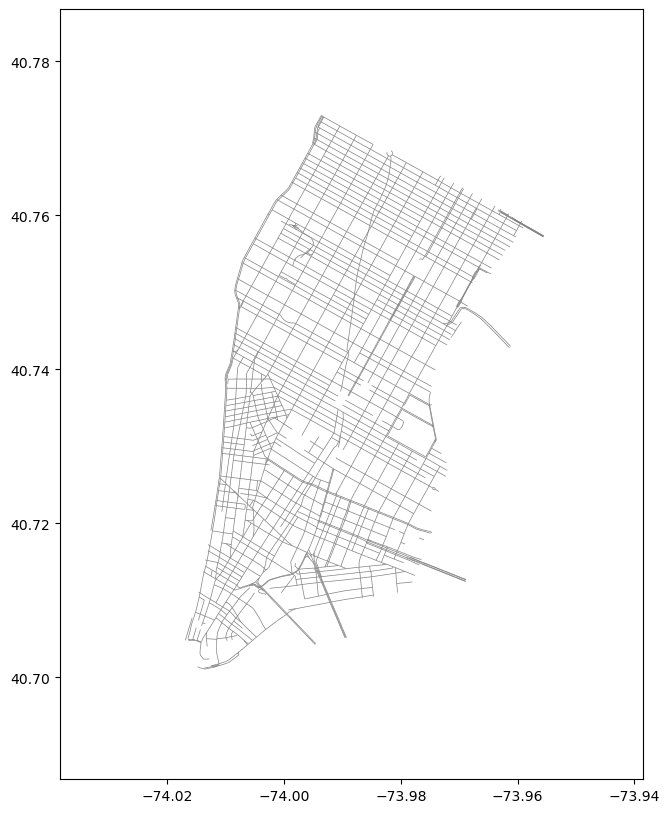

In [638]:
center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
json_matches.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)


# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.05, center_x + 0.05])
ax.set_ylim([center_y - 0.05, center_y + 0.05])

plt.show()

The map of json_matches is missing:
- F D R DRIVE
- Lincoln Tunnel
- Holland Tunnel
- Hugh L Carey Tunnel

In [652]:
czone_json.columns

Index(['rw_type', 'l_low_hn', 'pre_direct', 'st_width', 'r_zip', 'r_low_hn',
       'bike_lane', 'post_type', 'r_blkfc_id', 'bike_trafd', 'frm_lvl_co',
       'post_modif', 'pre_type', 'full_stree', 'l_blkfc_id', 'shape_leng',
       'to_lvl_co', 'modified', 'status', 'post_direc', 'r_high_hn', 'l_zip',
       'segment_ty', 'snow_pri', 'borocode', 'trafdir', 'pre_modifi',
       'st_label', 'physicalid', 'st_name', 'created', 'l_high_hn',
       'geometry'],
      dtype='object')

In [676]:
highways = czone_json[czone_json['rw_type'] == '2']
highways['st_name'].unique()

array(['12 AVENUE', '11 AVENUE', 'WEST STREET', 'F D R DRIVE',
       'BATTERY PARK UNDERPASS'], dtype=object)

In [677]:
FDR_json = czone_json[(czone_json['rw_type'] == '2') & (czone_json['st_name'] == "F D R DRIVE")]

In [689]:
FDR_json

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
1219,2,None,None,34.0,10010,None,None,DR,1222601462,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,1476,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97491 40.73598, -73.9749..."
1220,2,None,None,32.0,10010,None,None,DR,1222601462,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,1477,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97459 40.73703, -73.9744..."
1221,2,None,None,30.0,10010,None,None,DR,1222600843,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,1478,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97448 40.73719, -73.9743..."
1222,2,None,None,30.0,10010,None,None,DR,1222600936,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,1479,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97298 40.73957, -73.9729..."
1224,2,None,None,34.0,10009,None,None,DR,1222601462,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,1483,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97165 40.72813, -73.9716..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115250,2,None,None,30.0,10002,None,None,DR,212260028,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,189054,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.98660 40.71028, -73.9853..."
115384,2,None,None,30.0,10016,None,None,DR,1222600936,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,189513,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97194 40.74324, -73.9719..."
115386,2,None,None,30.0,10016,None,None,DR,1222600936,None,...,C,1,FT,None,FRANKLIN D ROOSEVELT DR,189518,F D R DRIVE,2020-12-28,None,"MULTILINESTRING ((-73.97194 40.74324, -73.9717..."
120994,2,None,None,36.0,10002,None,None,DR,212262080,None,...,C,1,TF,None,FRANKLIN D ROOSEVELT DR,200724,F D R DRIVE,2007-11-29,None,"MULTILINESTRING ((-73.97943 40.71117, -73.9791..."


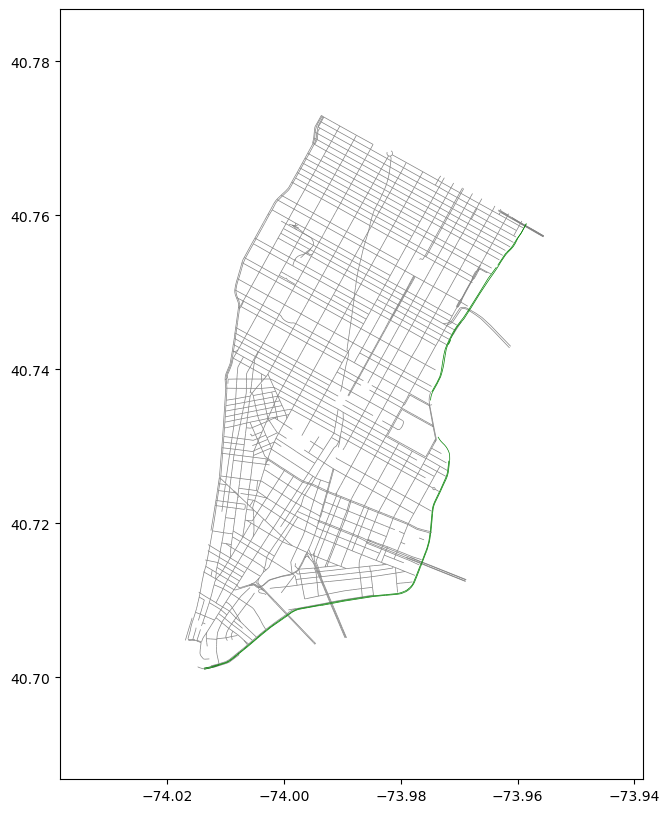

In [705]:
#Confirm that FDR_json fills in the East River outline of json_matches


center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2



fig, ax = plt.subplots(figsize=(10, 10))
json_matches.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)
#highways.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)
FDR_json.plot(ax=ax, color='green', edgecolor='black', linewidth=0.5)



'''
The following chunk of code was used to find that BATTERY PARK UNDERPASS
was the missing street at the bottom of Manhattan's outline.
Though BATTERY PARK UNDERPASS is not a street with data from the 
Automated Traffic Counts dataset, it is included 
by the code to follow for the map's readability.


mystery_spot = highways.cx[-74.02:-74.01, 40.70:40.705]
mystery_spot.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
'''



# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.05, center_x + 0.05])
ax.set_ylim([center_y - 0.05, center_y + 0.05])



plt.show()

In [703]:
#mystery_spot['st_name'].unique()

array(['BATTERY PARK UNDERPASS', 'WEST STREET', 'F D R DRIVE'],
      dtype=object)

--> Merge FDR_json and czone_json

--> Also add BATTERY PARK UNDERPASS

--> Also add Hugh L Carey Tunnel, Holland Tunnel, and Lincoln Tunnel

In [720]:
tunnels = Manhattan_json[Manhattan_json['rw_type'] == '4']

#filter to avoid repeating geometries
tunnels_include = ['HUGH L CAREY', 'LINCOLN', 'HOLLAND']
tunnels2 = tunnels[tunnels['st_name'].isin(tunnels_include)]

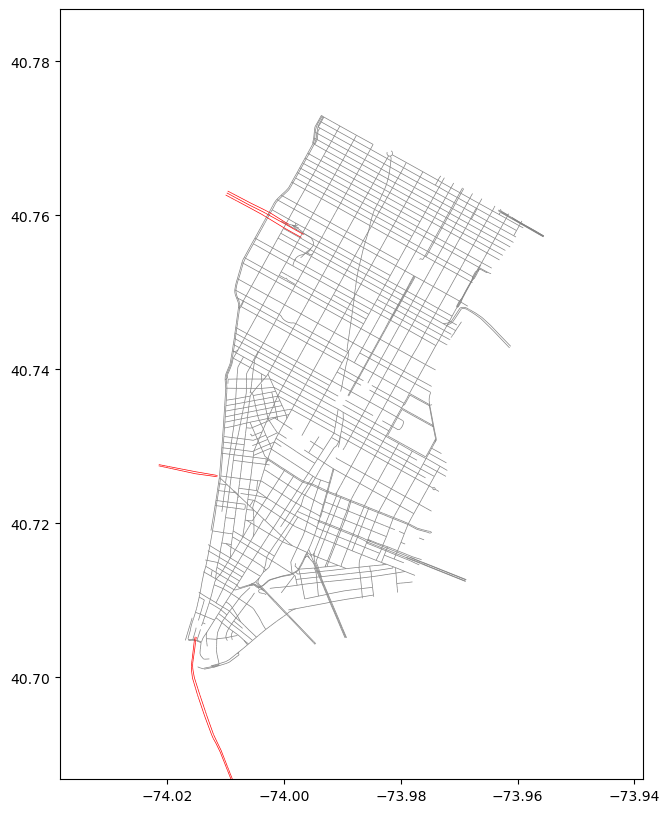

In [721]:
center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
json_matches.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)
tunnels2.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)

# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.05, center_x + 0.05])
ax.set_ylim([center_y - 0.05, center_y + 0.05])

plt.show()

In [704]:
BPU = czone_json[czone_json['st_name']== 'BATTERY PARK UNDERPASS']

In [708]:
#Merge FDR_json and BPU

FDR_jsonBPU = pd.concat([FDR_json, BPU], ignore_index=True)

In [722]:
#Merge FDR_jsonBPU and tunnels2

FDRtunnels2BPU = pd.concat([FDR_jsonBPU, tunnels2], ignore_index = True)

In [723]:
#Merge FDRtunnels2BPU with json_matches

czone_json2 = pd.concat([json_matches, FDRtunnels2BPU], ignore_index = True)

czone_json2 now represents the map of the data present in the 
czone_traffic dataset also created and exported from this notebook

Export the geojson data to use both datasets later to create an
animated map.

In [724]:

czone_json2.to_file('czone_json.geojson', driver='GeoJSON')

Also export czone_json to use as a base map with full detail


In [736]:


czone_json.to_file('base_map.geojson', driver='GeoJSON')

Check the scope of congestion_zone_filtered by mapping it with the final output

In [730]:
czf_json = czone_json2[czone_json2['st_name'].isin(congestion_zone_filtered['street'].unique())]

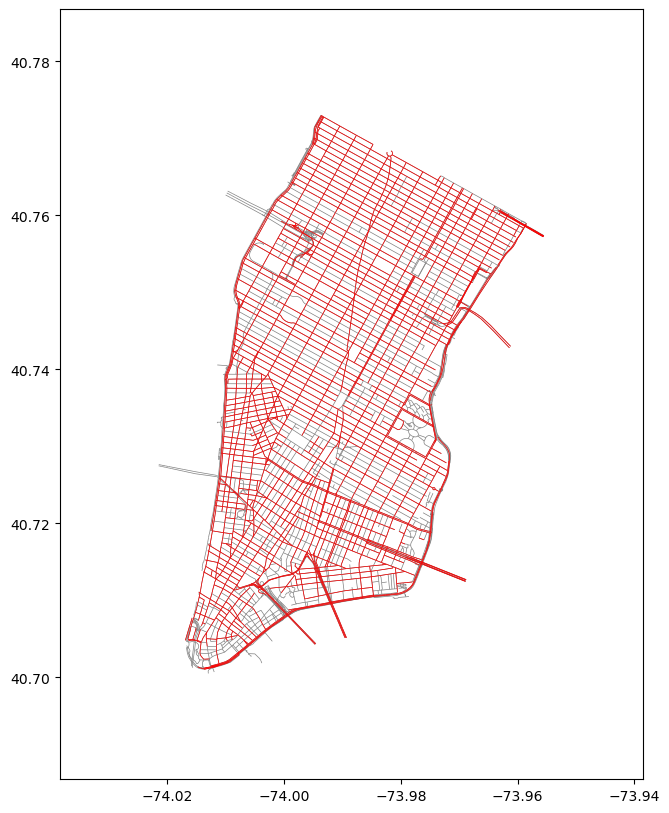

In [737]:

center_x = czone_json.total_bounds[0] + (czone_json.total_bounds[2] - czone_json.total_bounds[0]) / 2
center_y = czone_json.total_bounds[1] + (czone_json.total_bounds[3] - czone_json.total_bounds[1]) / 2
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
czone_json.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5)
czf_json.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)

# Zoom to fit all of Manhattan to reference starting dataset
ax.set_xlim([center_x - 0.05, center_x + 0.05])
ax.set_ylim([center_y - 0.05, center_y + 0.05])

plt.show()

In [729]:
congestion_zone_filtered['street'].unique()

array(['BROADWAY', 'CANAL STREET', '7 AVENUE', 'AMSTERDAM AVENUE',
       'E HOUSTON STREET', 'AVENUE OF THE AMERICAS', 'PARK AVENUE',
       'BOWERY', 'EAST HOUSTON STREET', '1 AVENUE', 'EAST 59 STREET',
       'EAST 57 STREET', 'EAST 55 STREET', 'EAST 56 STREET',
       'EAST 58 STREET', 'SPRING STREET', 'WASHINGTON STREET',
       'BANK STREET', 'MORTON STREET', 'CLINTON STREET', 'WILLIAM STREET',
       'NASSAU STREET', 'CHERRY STREET', 'WEST 34 STREET',
       'WEST 58 STREET', '5 AVENUE', 'EAST 11 STREET', '4 AVENUE',
       'DELANCEY STREET', 'C P 7 AVENUE APPROACH', 'WEST 14 STREET',
       'WEST 26 STREET', 'GROVE STREET', 'VARICK STREET', 'LEROY STREET',
       'WEST 15 STREET', 'WEST 11 STREET', 'DOWNING STREET',
       'BLEECKER STREET', 'CHRISTOPHER STREET', '7 AVENUE SOUTH',
       'WAVERLY PLACE', 'WEST 10 STREET', 'PERRY STREET',
       'CLARKSON STREET', 'WEST HOUSTON STREET', 'COMMERCE STREET',
       'BEDFORD STREET', 'GREENWICH AVENUE', 'WEST 31 STREET',
       'CHA